In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

from pylab import *
import numpy as np
from craco.search_pipeline import location2pix, get_grid_lut_from_plan, grid_candidates,wait_for_starts,waitall,print_candidates
from craco.search_pipeline import NBINARY_POINT_FDMTIN 
import craco
import craco.search_pipeline
from craco.pyxrtutil import *
import craft.craco_plan

from craft import uvfits

from craft.craco_plan import PipelinePlan
from craft.craco import printstats
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logging.info("test")
import time


INFO:root:test


In [2]:
fits='/data/craco/ban115/test_data/frb_d0_t0_a1_sninf_lm00/frb_d0_t0_a1_sninf_lm00.fits'
xclbin='/data/craco/ban115/builds/binary_container_1_10688715.xclbin'
xclbin='/data/craco/ban115/builds/binary_container_fe3fef0d.xclbin'

alloc_device_only=True

In [3]:
values = craco.search_pipeline.get_parser().parse_args([])
print(values)

Namespace(boxcar_weight='sum', calibration=None, cand_file='candidates.txt', cell=None, device=0, dump_boxcar_hist_buf=None, dump_candidates=None, dump_fdmt_hist_buf=None, dump_mainbufs=None, dump_uvdata=None, fdmt_scale=1.0, fft_scale=10.0, fft_shift1=0, fft_shift2=0, flag_ants=None, injection_file=None, input_scale=1.0, max_ndm=1024, nblocks=None, nbox=8, ncin=32, ndm=512, ndout=186, npix=256, nt=256, nuvmax=8192, nuvwide=8, os='2.1,2.1', run_fdmt=True, run_image=True, show=False, show_candidate_grid=None, subtract=True, threshold=10.0, uv=None, verbose=False, wait=False, xclbin='binary_container_1.xclbin.golden')


In [8]:
device = pyxrt.device(0)
xbin = pyxrt.xclbin(xclbin)
uuid = device.load_xclbin(xbin)


In [9]:
f = uvfits.open(fits)
plan = PipelinePlan(f, "--ndm 512")

INFO:root:Opening file /data/craco/ban115/test_data/frb_d0_t0_a1_sninf_lm00/frb_d0_t0_a1_sninf_lm00.fits
INFO:craft.craco_plan:making Plan values=Namespace(boxcar_weight='sum', cell=None, fdmt_scale=1.0, fft_scale=10.0, flag_ants=None, max_nbl=630.0, max_ndm=1024, nbox=8, ncin=32, ndm=512, ndout=186, npix=256, nt=256, nuvmax=8192, nuvwide=8, os='2.1,2.1', pickle_fname='pipeline.pickle', save=False, show=False, show_fdmt=False, show_image=False, target_input_rms=512, threshold=3, uv='uv_data', verbose=False)
INFO:craft.uvfits:Got radec=(0.0 deg/-30.0 deg) from OBSRA header
INFO:craft.craco_plan:Nbl=190 Fch1=734499993.896500 foff=1000000.047500 nchan=256 lambdamin=0.303183 uvmax=(2911.4697076148336, 3545.126390846302) max baseline=(0.8827093552099541, 1.074823558155913) resolution=[70.84559585 58.18263822]arcsec uvcell=[33.73599803 27.7060182 ] arcsec uvcell= (23.883149945277932, 29.081114924911077) lambda FoV=[2.3990043  1.97020574] deg oversampled=(2.1, 2.1) wcs=WCS Keywords

Number of

parsing values --ndm 512


INFO:craft.craco_plan:Got Ncells=3784 uvcells
INFO:craft.craco_plan:FDMT plan has ntotal=5136 of 642 runs with packing efficiency 0.736760. Grid read requires efficiency of > 0.626953 of NUV=8192. History size square=733667328 minimal=158679584 =2 256MB HBM banks
INFO:craft.craco_plan:FDMT zero cell is (641, 7)=5135
INFO:craft.craco_plan:Saving uvgrid.split shape=(5117, 14) type=float64 to uv_data.uvgrid.split.txt header=ant1, ant2, u(pix), v(pix), chan1, chan2, irun, icell, total_overlap, max_idm, max_offset, offset_cff, idm_cff, fch1
INFO:craft.craco_plan:Got 3352 unique UV coords. Upper=True
INFO:craft.craco_plan:Need to write 210 groups of 16 register to pad function
INFO:craft.craco_plan:Got 3331 unique UV coords. Upper=False
INFO:craft.craco_plan:Need to write 209 groups of 16 register to pad function
INFO:craft.craco_plan:Got 5212 upper grid instructions
INFO:craft.craco_plan:Saving gridlut.upper shape=(5212, 5) type=int32 to uv_data.gridlut.upper.txt header=target_slot, uvidx, 

Upper registers [(3, 1), (4, 1), (34, 2), (35, 2), (36, 2), (37, 2), (38, 2), (39, 2), (40, 2), (41, 2), (42, 2), (43, 2), (44, 2), (45, 2), (46, 2), (87, 2), (88, 2), (89, 2), (90, 2), (91, 2), (92, 2), (93, 2), (94, 2), (95, 2), (96, 2), (97, 2), (98, 2), (99, 2), (100, 2), (101, 2), (102, 2), (103, 2)]
Lower registers [(1, 3), (1, 4), (2, 4), (3, 4), (3, 5), (3, 6), (4, 6), (4, 7), (2, 8), (4, 8), (2, 9), (3, 9), (4, 9), (5, 9), (3, 10), (5, 10), (7, 10), (3, 11), (5, 11), (6, 11), (7, 11), (7, 12), (8, 12), (8, 13), (9, 13), (7, 14), (8, 14), (9, 14), (8, 15), (8, 16), (9, 16), (2, 17)]


INFO:craft.craco_plan:Saving padlut.lower shape=(32640, 3) type=int32 to uv_data.padlut.lower.txt header=upix, vpix, regidx
INFO:craft.craco_plan:Saving doshift.lower shape=(4096,) type=int32 to uv_data.doshift.lower.txt header=doshift
INFO:craft.craco_plan:Saving ddreader shape=(2048,) type=uint32 to uv_data.ddreader.txt header=value


In [10]:
print(plan.ndout)

186


In [11]:
p = craco.search_pipeline.Pipeline(device, xbin, plan, alloc_device_only)

INFO:craco.search_pipeline:2568 2606 2597
INFO:craco.search_pipeline:(180214,)


Kernel krnl_ddgrid_reader_4cu:krnl_ddgrid_reader_4cu_1 has groups
GID=0=32
GID=1=-1
GID=2=-1
GID=3=-1
GID=4=-1
GID=5=15
Kernel krnl_grid_4cu:krnl_grid_4cu_1 has groups
GID=0=-1
GID=1=-1
GID=2=-1
GID=3=-1
GID=4=-1
GID=5=6
Kernel krnl_grid_4cu:krnl_grid_4cu_2 has groups
GID=0=-1
GID=1=-1
GID=2=-1
GID=3=-1
GID=4=-1
GID=5=7
Kernel krnl_grid_4cu:krnl_grid_4cu_3 has groups
GID=0=-1
GID=1=-1
GID=2=-1
GID=3=-1
GID=4=-1
GID=5=20
Kernel krnl_grid_4cu:krnl_grid_4cu_4 has groups
GID=0=-1
GID=1=-1
GID=2=-1
GID=3=-1
GID=4=-1
GID=5=21
Kernel fft2d:fft2d_1 has groups
Kernel fft2d:fft2d_2 has groups
Kernel fft2d:fft2d_3 has groups
Kernel fft2d:fft2d_4 has groups

INFO:craco.search_pipeline:lut.shape (180214,)
INFO:craco.search_pipeline:nuv 5136
INFO:craco.search_pipeline:Allocating grid LUTs
INFO:craco.search_pipeline:Allocating FDMT Input
INFO:craco.search_pipeline:5136
INFO:craco.search_pipeline:256
INFO:craco.search_pipeline:32
INFO:craco.search_pipeline:8
INFO:craco.search_pipeline:642
INFO:craco.search_pipeline:186
INFO:craco.search_pipeline:FDMT input buffer size 160.5 MB
INFO:craco.search_pipeline:Allocating FDMT history



Kernel krnl_boxc_4cu:krnl_boxc_4cu_1 has groups
GID=0=-1
GID=1=-1
GID=2=-1
GID=3=54
GID=4=54
GID=5=4
Kernel fdmt_tunable_c32:fdmt_tunable_c32_1 has groups
GID=0=52
GID=1=32
GID=2=53
GID=3=53
GID=4=14
Allocated 360428 bytes flags=flags.normal groupid=6 address=0x60000000
Allocated 360428 bytes flags=flags.normal groupid=7 address=0x70000000
Allocated 360428 bytes flags=flags.normal groupid=20 address=0x140000000
Allocated 360428 bytes flags=flags.normal groupid=21 address=0x150000000
Allocated 168296448 bytes flags=flags.normal groupid=52 address=0x90000000
Allocated 268435456 bytes flags=flags.normal groupid=53 address=0xa0000000


INFO:craco.search_pipeline:Allocating mainbuf
INFO:craco.search_pipeline:FDMT output buffer size 10.021453857421875 GB
INFO:craco.search_pipeline:Mainbuf shape is (642, 186, 11, 256, 8, 2) breaking into 8 buffers of [81, 186, 11, 256, 8, 2]


Allocated 636864 bytes flags=flags.normal groupid=14 address=0xe0000000
Allocated 1357627392 bytes flags=flags.normal groupid=32 address=0x4000000000
Allocated 1357627392 bytes flags=flags.normal groupid=32 address=0x4050ebc000
Allocated 1357627392 bytes flags=flags.normal groupid=32 address=0x40a1d78000
Allocated 1357627392 bytes flags=flags.normal groupid=32 address=0x40f2c34000
Allocated 1357627392 bytes flags=flags.normal groupid=32 address=0x4143af0000
Allocated 1357627392 bytes flags=flags.normal groupid=32 address=0x41949ac000
Allocated 1357627392 bytes flags=flags.normal groupid=32 address=0x41e5868000
Allocated 1357627392 bytes flags=flags.normal groupid=32 address=0x4236724000


INFO:craco.search_pipeline:Allocating ddreader_lut
INFO:craco.search_pipeline:Allocating boxcar_history


Allocated 8192 bytes flags=flags.normal groupid=15 address=0xf0000000
Allocated 939524096 bytes flags=flags.normal groupid=54 address=0x0


INFO:craco.search_pipeline:Boxcar history (1024, 7, 256, 256) 939524096 2
INFO:craco.search_pipeline:Allocating candidates


Allocated 1048576 bytes flags=flags.normal groupid=4 address=0x40000000


# Let's put a 0 DM pulse in the last few samples of mainbuf so we can see what it looks like in the boxcar history

In [12]:
p.clear_buffers(values)
# dmamp = 32 gives SNR=14.2
dmamp = 1
t0 = 252 # If I make t0=between 255-NBOX (-1?) and 255 I should see it in the boxcar history
dm = 0

# put in a value for a single time and DM
for b in p.all_mainbufs:
    print(b.shape)
    #b.nparr[:] = dmamp #np.random.randn(*b.nparr.shape)
    #b.nparr[:] = dmamp
    b.nparr[:,dm,0,t0,:,0] = dmamp
    b.copy_to_device() 

INFO:craco.search_pipeline:Clearing mainbuf data NBLK=11


[81, 186, 11, 256, 8, 2]
[81, 186, 11, 256, 8, 2]
[81, 186, 11, 256, 8, 2]
[81, 186, 11, 256, 8, 2]
[81, 186, 11, 256, 8, 2]
[81, 186, 11, 256, 8, 2]
[81, 186, 11, 256, 8, 2]
[81, 186, 11, 256, 8, 2]


In [13]:
check_mainbuf = False

if check_mainbuf:
    mainbuf = p.copy_mainbuf()
    print(mainbuf.shape)
    plot(mainbuf[:,0,0,t0,:,0].flat)
    assert np.all(mainbuf[:,0,0,t0,:,0] == dmamp)
    assert np.all(mainbuf[:,1:,1:,:t0,:,1] == 0)
    assert np.all(mainbuf[:,1:,1:,:t0+1,:,1] == 0)
    print(mainbuf.sum())

In [14]:
values.run_fdmt = False
values.run_image = True
values.threshold = 10
print(values)
p.run(0, values).wait()

INFO:craco.search_pipeline:nConfiguration just before pipeline running 
ndm=512 nchunk_time=32 tblk=0 nuv=5136 nparallel_uv=2568 nurest=642 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=0 fft_cfg=40000000

INFO:craco.search_pipeline:Last candidate is (0, 0, 0, 0, 0)
INFO:craco.search_pipeline:Candidates cleared
INFO:craco.search_pipeline:10 kernels running


Namespace(boxcar_weight='sum', calibration=None, cand_file='candidates.txt', cell=None, device=0, dump_boxcar_hist_buf=None, dump_candidates=None, dump_fdmt_hist_buf=None, dump_mainbufs=None, dump_uvdata=None, fdmt_scale=1.0, fft_scale=10.0, fft_shift1=0, fft_shift2=0, flag_ants=None, injection_file=None, input_scale=1.0, max_ndm=1024, nblocks=None, nbox=8, ncin=32, ndm=512, ndout=186, npix=256, nt=256, nuvmax=8192, nuvwide=8, os='2.1,2.1', run_fdmt=False, run_image=True, show=False, show_candidate_grid=None, subtract=True, threshold=10, uv=None, verbose=False, wait=False, xclbin='binary_container_1.xclbin.golden')


INFO:craco.search_pipeline:Waiting for 10 starts


In [15]:
mainbuf = p.copy_mainbuf()

In [16]:
cands = p.get_candidates()
print(f'Got {len(cands)} candidates')
if len(cands) == 0: # are you sure?
    p.candidates.copy_from_device()
    print(p.candidates.nparr)
    
print_candidates(cands, 256, 0)
print("The sume all the mainbufs was", mainbuf.sum())

INFO:craco.search_pipeline:Last candidate is (0, 0, 0, 0, 0)


Got 0 candidates
[(0, 0, 0, 0, 0) (0, 0, 0, 0, 0) (0, 0, 0, 0, 0) ... (0, 0, 0, 0, 0)
 (0, 0, 0, 0, 0) (0, 0, 0, 0, 0)]
# SNR	lpix	mpix	boxc_width	time	dm	iblk	rawsn

The sume all the mainbufs was 5184


<IPython.core.display.Javascript object>


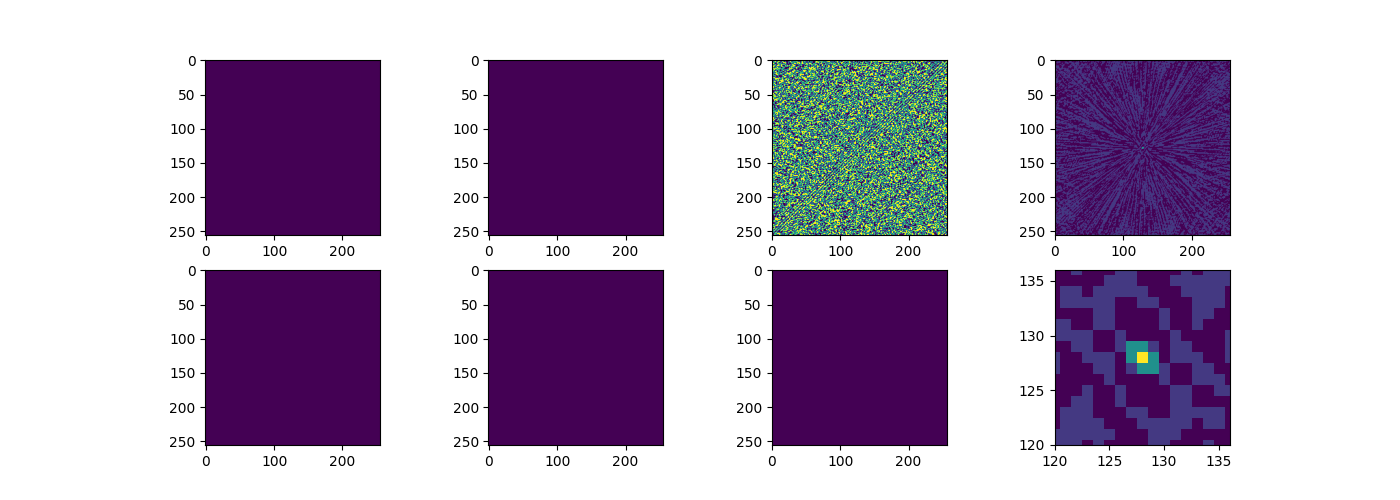

Boxcar max boxcar=0 max=0
Boxcar max boxcar=1 max=0
Boxcar max boxcar=2 max=0
Boxcar max boxcar=3 max=5
Boxcar max boxcar=4 max=0
Boxcar max boxcar=5 max=0
Boxcar max boxcar=6 max=0


In [17]:
p.boxcar_history.copy_from_device()
fig, ax = subplots(2,4)
fig.set_size_inches(14,5)
ax = ax.flatten()
for b, myax in zip(range(p.boxcar_history.shape[1]), ax):
    d = p.boxcar_history.nparr[dm, b, :, :]
    print(f'Boxcar max boxcar={b} max={d.max()}')
    myax.imshow(np.fft.fftshift(d))

In [18]:
imshow(np.fft.fftshift(p.boxcar_history.nparr[dm,3,:,:]))
xlim(128-8,128+8)
ylim(128-8,128+8)

(120.0, 136.0)

In [19]:
scale = p.boxcar_history.nparr.max() / mainbuf.sum()
print(f'scale={scale} {1/scale}')

scale=0.0009645061728395061 1036.8


# with FFT scale = 7, the scaling from sum(input) to output is 8. Roughly. Does this make sense?
I.e. the output is 1/8 of the sum of the inputs.
Well, You might think the scaling would be 8*8 for the FFT, reduced bye 128 for the intermediate scaling. The the
remaining scaling must be 4096 = $2^{12}$. Does that make sense? Maybe, but it probably doesn't matter too much.It must be to do with how the top 16 bits are taken in the output. It's a 36 bit number. Only the top 16 bits are kept, so you could say it's dividing by $2^{20}$ - but that's much larger than $2^{12}$


In [20]:
print(values.fft_shift1)
print(values.fft_shift2)

0
0


In [21]:
print(cands)
cands = cands[cands['dm'] == 0] # DM 0 adn 1 are repeated, I think.

[]


<IPython.core.display.Javascript object>


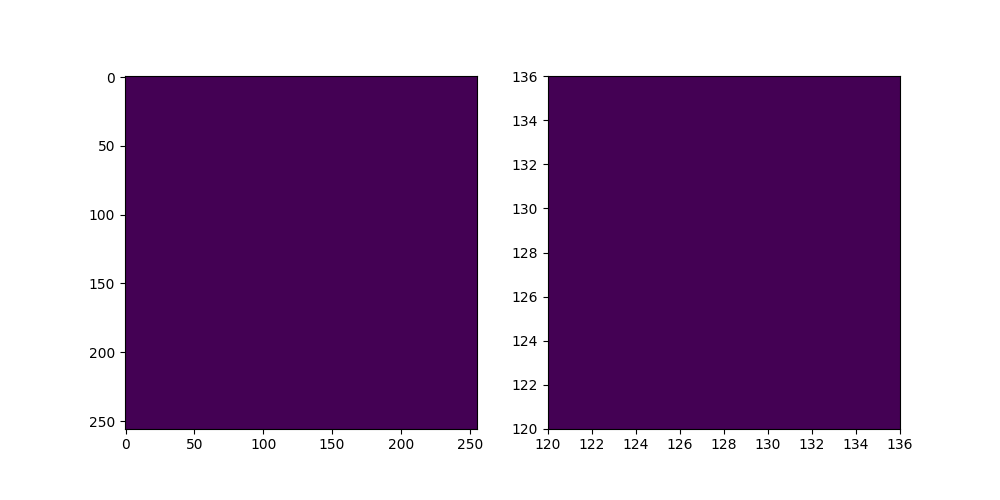

In [22]:
grid = grid_candidates(cands, 'snr')
fig, ax = subplots(1,2)
ax[0].imshow(grid)
ax[1].imshow(grid)
ax[1].set_xlim(128-8,128+8)
ax[1].set_ylim(128-8,128+8)
fig.set_size_inches([10,5])

<IPython.core.display.Javascript object>


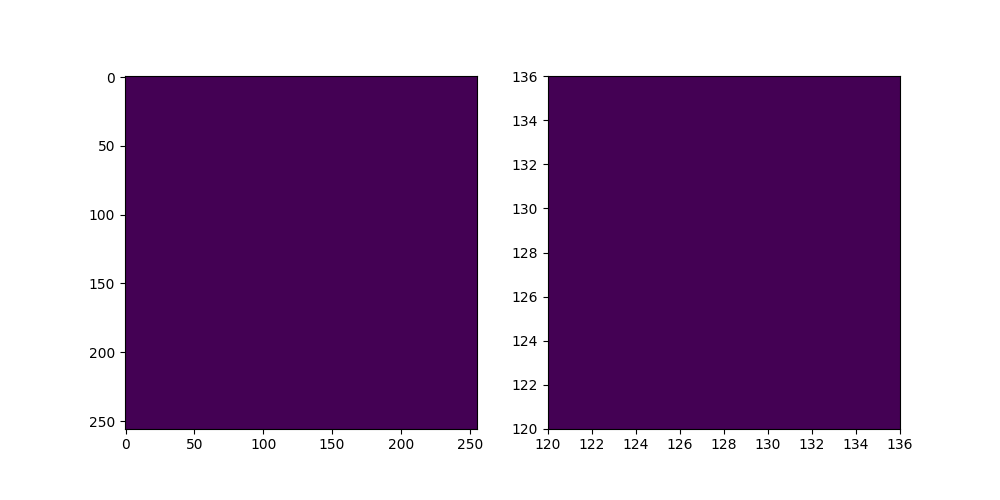

In [23]:
grid = grid_candidates(cands, 'count')
fig, ax = subplots(1,2)
ax[0].imshow(grid)
ax[1].imshow(grid)
ax[1].set_xlim(128-8,128+8)
ax[1].set_ylim(128-8,128+8)
fig.set_size_inches([10,5])

# Check DM0 for trange makes sense

In [24]:
location2pix(0)

(array(128), array(128))

In [25]:
all_cands = []
dm = 0
for t0 in range(16):
    p.clear_buffers(values)
    # dmamp = 32 gives SNR=14.2
    dmamp = 32
    print('t0', t0)

    # put in a value for a single time and DM
    for b in p.all_mainbufs:
        b.nparr[:] = 0
        b.nparr[:,dm,0,t0,:,0] = dmamp
        b.copy_to_device()

    values.run_fdmt = False
    values.run_image = True
    values.threshold = 5
    p.run(0, values).wait()
    cands = p.get_candidates().copy()
    all_cands.append(cands)
    c0 = cands[0]
    print(c0)
    #assert c0['upix'] == 128
    #assert c0['vpix'] == 128
    #assert c0['boxc_width'] == 0
    #assert c0['time'] == t0
    #assert c0['dm'] == 0
    print_candidates(cands, 256, 0)
    centrepix = cands[cands['loc_2dfft'] == 0] # 128, 128
    print_candidates(centrepix, 256,0)
    

    

INFO:craco.search_pipeline:Clearing mainbuf data NBLK=11


t0 0


INFO:craco.search_pipeline:nConfiguration just before pipeline running 
ndm=512 nchunk_time=32 tblk=0 nuv=5136 nparallel_uv=2568 nurest=642 load_luts=1 nplane=16384 threshold=320 shift1=0 shift2=0 fft_cfg=40000000

INFO:craco.search_pipeline:Last candidate is (0, 0, 0, 0, 0)
INFO:craco.search_pipeline:Candidates cleared
INFO:craco.search_pipeline:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:craco.search_pipeline:Last candidate is (0, 0, 0, 0, 0)


IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
for c in all_cands:
    print_candidates(c, 256, 0)

# FDMT the input of DM=0

In [ ]:
all_cands = []
t0 = 0
print(p.inbuf.shape)

values.run_fdmt = True
values.run_image = True
values.threshold = 10
p.clear_buffers(values)
p.inbuf.nparr[:,t0,:,:,0] = 1
p.inbuf.copy_to_device()



In [ ]:

print('t0', t0)

p.run(0, values).wait()
cands = p.get_candidates().copy()


In [ ]:
grid = grid_candidates(cands, 'count')
fig, ax = subplots(1,2)
ax[0].imshow(grid)
ax[1].imshow(grid)
ax[1].set_xlim(128-8,128+8)
ax[1].set_ylim(128-8,128+8)
fig.set_size_inches([10,5])

In [ ]:
grid = grid_candidates(cands, 'snr')
fig, ax = subplots(1,2)
ax[0].imshow(grid)
ax[1].imshow(grid)
ax[1].set_xlim(128-8,128+8)
ax[1].set_ylim(128-8,128+8)
fig.set_size_inches([10,5])

In [ ]:
mainbuf = p.copy_mainbuf()

In [ ]:
print(mainbuf.shape)
# look at the DM-time plan for UV 0
d = mainbuf[0,:,0,:,0,0]
imshow(d, aspect='auto', origin='lower')
xlabel('time')
ylabel('dm')
printstats(d)

In [ ]:
# look at DM=0 for all UVs
d = mainbuf[:,0,0,:,:,0].transpose([0,2,1])
print(d.shape)
d = d.reshape(d.shape[0]*d.shape[1], d.shape[2])
print(d.shape)

imshow(d.T, aspect='auto', origin='lower')
xlabel('UV')
ylabel('Time')

In [ ]:
print(dir(plan))
plot(d[:plan.fdmt_plan.nuvtotal, 0])
 # Oh yeah, OK, this makes sense. It's 32 for all baselines because I made every UV = 1. IN practice, it won't be that neat.

# And what if I grid everything properly - i.e. start with baslines,the convert to UV then run the pipeline

In [ ]:
print(plan.baseline_shape) # nbl, nc, nt


In [ ]:

values.input_scale = 1 # need this otherwise somewhere candidates overflow.
signal = 16*3
noise = 1024
din = np.zeros(plan.baseline_shape, dtype=np.complex64)

snincrease = np.sqrt(plan.nf * plan.nbl)
if noise == 0:
    sovern = 100
else:
    sovern = signal/noise

expectedsn = sovern*snincrease

    
din[:, :, -1] += signal # making this 32 overflows the FDMT
din += noise*(np.random.randn(din.size).reshape(din.shape) + 1j*np.random.randn(din.size).reshape(din.shape))
img_noise_level = noise*snincrease/(1<<10)#/np.sqrt(2) # Sum of real and imaginary?
img_signal_level = signal*plan.nf*plan.nbl/(1<<10)
print(f'SN per baseline is num things is {plan.nf*plan.nbl} {signal}/{noise}={sovern} snincrease={snincrease} expected S/N={expectedsn} din.real.std={din.real.std()} imgnoise level={img_noise_level} signal level={img_signal_level}')

# noise = 64 I get 1600 as teh std of the boxcar

In [ ]:
values.fft_shift1 = 0 # dividing
values.fft_shift2 = 0 # multiplying
values.run_fdmt = True
values.run_image = True
values.threshold = 10
p.clear_buffers(values)
p.copy_input(din, values)
p.run(0, values).wait()



p.boxcar_history.copy_from_device()
maxbc = p.boxcar_history.nparr.max()
actual_noise = p.boxcar_history.nparr[0,1:,::4,::4].std(axis=0).mean()
actual_noise2 = p.boxcar_history.nparr[0,1:,0,0].std(axis=0)
actual_signal=p.boxcar_history.nparr[0,0,0,0]
actualsn = actual_signal/actual_noise
actualsn2 = actual_signal/actual_noise2
print(f'Input S={signal} N={noise} Found S/N={actualsn:0.1f} v2={actualsn2:0.1f} expected={expectedsn:0.1f} noise={actual_noise} noise2={actual_noise2} signal={actual_signal}')
print(f'Expected noise ratio noise1={actual_noise/img_noise_level:0.3f} noise2={actual_noise2/img_noise_level:0.3f} signal={img_signal_level/actual_signal:0.3f}')
print(printstats(p.boxcar_history.nparr[0,...]))

cands = p.get_candidates()
print_candidates(cands[:6], 256, 0)


In [ ]:
inbuf = p.inbuf.copy_from_device().nparr 
inbuf.shape

In [ ]:
inbuf = np.transpose(inbuf, [0,3,1,2,4]).reshape(-1,256,32,2)
inbuf.shape

In [ ]:
t0 = inbuf[:,-1,:,:]
print(f'inbuf real={t0[:,:,0].sum()}/{t0[:,:,0].std()} imag={t0[:,:,1].mean()}/{t0[:,:,1].std()} ')

In [ ]:
print_candidates(cands, 256, 0)


In [ ]:
figure()
p.boxcar_history.shape
plot(p.boxcar_history.nparr[0,:,0,0])

In [ ]:
bch = p.boxcar_history.nparr
bch.std()

In [ ]:
bch[0,1:,0,0].std()

In [ ]:
bch[0,:,0,0].max()

In [ ]:
bch[0,:,0,0].max()/bch[0,1:,0,0].std()

In [ ]:
bch[0,1:,:,:].std()

In [ ]:
print(printstats(bch[0,...].std(axis=0)))

din.real.std()

In [ ]:
snr = bch[0,0,:,:]
figure()
imshow(np.fft.fftshift(snr))
print(printstats(snr))
y = 128
x=128
xlim(x-8,x+8)
ylim(y-8,y+8)

In [ ]:
_ = hist(snr.flatten(), bins=100)

In [ ]:
check_mainbuf = True
if check_mainbuf:
    mainbuf = p.copy_mainbuf()
    print(mainbuf.shape)
    # look at the DM-time plan for UV 0
    d = mainbuf[0,:,0,:,0,0]
    imshow(d, aspect='auto', origin='lower')
    printstats(d)
    
    # look at DM=0 for all UVs
    d = mainbuf[:,0,0,:,:,0].transpose([0,2,1])
    print(d.shape)
    d = d.reshape(d.shape[0]*d.shape[1], d.shape[2])
    print(d.shape)
    figure()
    imshow(d.T, aspect='auto', origin='lower')

In [ ]:
mainbuf.shape

In [ ]:
mainbuf[:,0,0,:,:,0].sum()

In [ ]:
idm = 0
# complex image was boxcar0 + boxcar1
complexim = np.fft.fftshift(bch[idm, 0, :, :] + 1j*bch[idm,1,:,:])
uvplane = np.fft.ifft2(complexim)
fig, ax = subplots(1,3)
ax[0].imshow(abs(uvplane))
ax[1].imshow(complexim.real)
ax[1].set_xlim(128-8,128+8)
ax[1].set_ylim(128-8,128+8)
ax[2].imshow(complexim.imag)
ax[2].set_xlim(128-8,128+8)
ax[2].set_ylim(128-8,128+8)
fig.set_size_inches([10,5])
ax[0].set_title('abs(uvplane)')
ax[1].set_title('real(image)')
ax[2].set_title('imag(image)')


In [ ]:
idm = 0
# complex image was boxcar0 + boxcar1
complexim = np.fft.fftshift(bch[idm, 0, :, :] + 1j*bch[idm,1,:,:]*0)
uvplane2 = np.fft.ifft2(complexim)
fig, ax = subplots(1,4)
ax[0].imshow(abs(uvplane))
ax[1].imshow(complexim.real)
ax[1].set_xlim(128-8,128+8)
ax[1].set_ylim(128-8,128+8)
ax[2].imshow(complexim.imag)
ax[2].set_xlim(128-8,128+8)
ax[2].set_ylim(128-8,128+8)
ax[3].imshow(abs(uvplane-uvplane2))
fig.set_size_inches([10,5])
ax[0].set_title('abs(uvplane)')
ax[1].set_title('real(image)')
ax[2].set_title('imag(image)')

In [ ]:
grid = grid_candidates(cands, 'snr')
fig, ax = subplots(1,2)
ax[0].imshow(grid)
ax[1].imshow(grid)
ax[1].set_xlim(128-8,128+8)
ax[1].set_ylim(128-8,128+8)
fig.set_size_inches([10,5])

In [ ]:
bch.shape

In [ ]:
figure()
imshow(bch[:16,:,0,0], aspect='auto', origin='lower')
xlabel('Sample')
ylabel('IDM')
figure()
plot(bch[:16,:,0,0].T)
xlabel('Sample')


# How about pulse with Nonzero DM?

In [ ]:
from craft import simfrb

In [ ]:
dm = 100
toff = 10
tsamp = 1.7
frb = simfrb.mkfrb_fdmt(plan.fmin/1e9, plan.foff/1e9, plan.nf, tsamp, dm, toffset=toff, ntimes=plan.nt)

In [ ]:
imshow(frb.T, aspect='auto', origin='lower', interpolation='none')
xlim(50,100)

In [ ]:
din[:] = 0
print(din.shape, frb.shape)
din[:] = frb.T
fast_baseline2uv(din, uv_out)
assert din.sum() == uv_out.sum(), 'baseline2uv didnt conserve energy'

In [ ]:
imshow(din[0,:,:].real, origin='lower')

In [ ]:
plot(uv_out.sum(axis=1).sum(axis=1).real)

In [ ]:
print(uv_out.shape, uv_out.sum(), din.sum())
imshow(uv_out[1,:,:,0].real.T, aspect='auto', origin='lower')

In [ ]:
# This one seems to hang when together with the 3 cells below. Let's space it out.
p.clear_buffers(values)


In [ ]:

p.inbuf.nparr[:,:,:,:,0] = np.round(uv_out[:,:,:,:].real*(values.input_scale*float(1<<NBINARY_POINT_FDMTIN)))
p.inbuf.nparr[:,:,:,:,1] = np.round(uv_out[:,:,:,:].imag*(values.input_scale*float(1<<NBINARY_POINT_FDMTIN)))
p.inbuf.copy_to_device()
values.run_fdmt = True
values.run_image = True
values.threshold = 10


In [ ]:
p.run(0, values).wait()

In [ ]:
cands = p.get_candidates()
print_candidates(cands, 256, 0)

In [ ]:
grid = grid_candidates(cands, 'snr')
fig, ax = subplots(1,2)
ax[0].imshow(grid)
ax[1].imshow(grid)
ax[1].set_xlim(128-8,128+8)
ax[1].set_ylim(128-8,128+8)
fig.set_size_inches([10,5])

In [ ]:
grid = grid_candidates(cands, 'count')
fig, ax = subplots(1,2)
ax[0].imshow(grid)
ax[1].imshow(grid)
ax[1].set_xlim(128-8,128+8)
ax[1].set_ylim(128-8,128+8)
fig.set_size_inches([10,5])

In [ ]:
mainbuf = p.copy_mainbuf()

In [ ]:
print(mainbuf.shape)
d = mainbuf[0,:,0,:,0,0]
imshow(d, aspect='auto', origin='lower')
printstats(d)

In [ ]:
!ls *mainbuf*

In [ ]:
mb = []
for b in range(8):
    mb.append(np.load(f'mainbuf_after_run_iblk0_ib{b}.npy'))
    
nb = np.array(mb)

In [ ]:
nb.shape

In [ ]:
nb.shape = (nb.shape[0]*nb.shape[1], nb.shape[2], nb.shape[3], nb.shape[4],8,2)

In [ ]:
nb.shape

In [ ]:
del nb
del mb

In [ ]:
import scipy
scipy.special.erfc(4.5/sqrt(2))

In [ ]:
1/(256*256*8)

In [ ]:
values.input_scale

In [ ]:
peaks = np.zeros((8,8))
for shift1 in range(8):
    for shift2 in range(8):
        values.fft_shift1 = shift1
        values.fft_shift2 = shift2
        values.run_fdmt = True
        values.run_image = True
        values.threshold = 10
        p.clear_buffers(values)
        p.copy_input(din, values)
        p.run(0, values).wait()

        p.boxcar_history.copy_from_device()
        maxbc = p.boxcar_history.nparr.max()
        actual_noise = p.boxcar_history.nparr[0,1:,:,:].std(axis=0).mean()
        actual_noise2 = p.boxcar_history.nparr[0,1:,0,0].std(axis=0)
        actual_signal=p.boxcar_history.nparr[0,0,0,0]
        actualsn = actual_signal/actual_noise
        actualsn2 = actual_signal/actual_noise2
        print(f'shift1={shift1} shift2={shift2} Input S={signal} N={noise} Found S/N={actualsn:0.1f} v2={actualsn2:0.1f} expected={expectedsn:0.1f} noise={actual_noise} noise2={actual_noise2} signal={actual_signal}')
        print(printstats(p.boxcar_history.nparr[0,...]))
        p.boxcar_history.copy_from_device()
        bch = p.boxcar_history.nparr
        peak = bch[0,:,0,0].max()
        peaks[shift1,shift2] = peak


In [ ]:
figure()
imshow(peaks)
ylabel('shift1')
xlabel('shift2')